In [7]:
%matplotlib inline
import matplotlib.pylab

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# The special thing about time series is that data points relate to one another...they are not independent
So we can to compare them and relate them. One way to do this is to look at how they change. For example, we can 'difference' a time series

In [8]:
ts = pd.Series(np.random.randn(20), pd.date_range('7/1/16', freq = 'D', periods = 20))
ts_lagged = ts.shift(-5)

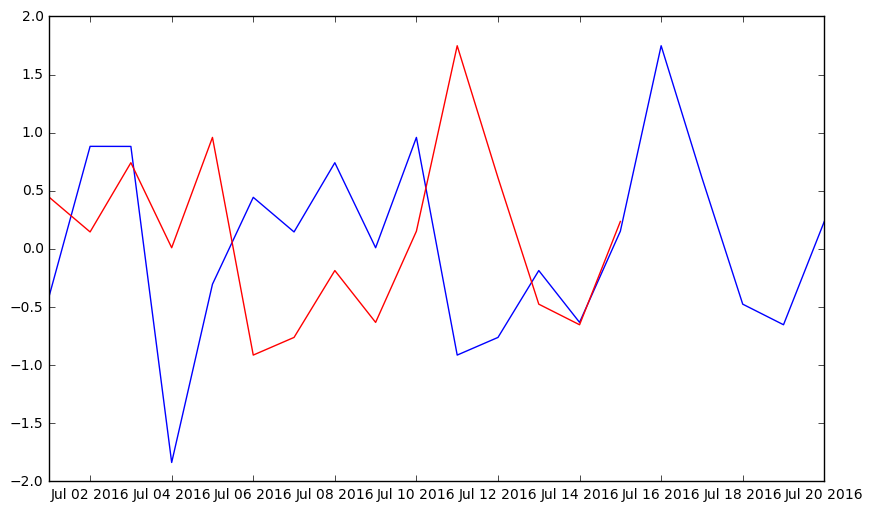

In [9]:
plt.plot(ts, color = 'blue')
plt.plot(ts_lagged, color = 'red')

### Query: how can I shift my time series 'into the future' instead of into the past?

In [10]:
# %load snippets/shift_future.py


# Window functions give you moving aggregate measures of a time series

In [11]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample()

In [12]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('5/1/2016', freq = 'D', periods = 600), columns = ['A', 'B', 'C'])

In [13]:
r = df.rolling(window = 20)
r

Rolling [window=20,center=False,axis=0]

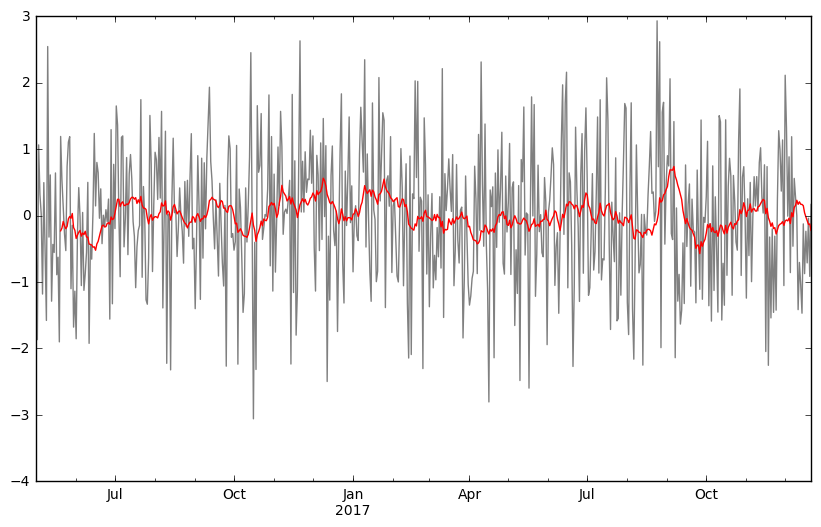

In [14]:
df['A'].plot(color = 'gray')
r.mean()['A'].plot(color = 'red')

### Try out some of these options with .rolling()

r.agg, r.apply, r.count, r.max, r.median, r.name, r.quantile, r.kurt, 
r.aggregate, r.std, r.skew, r.sum, r.var

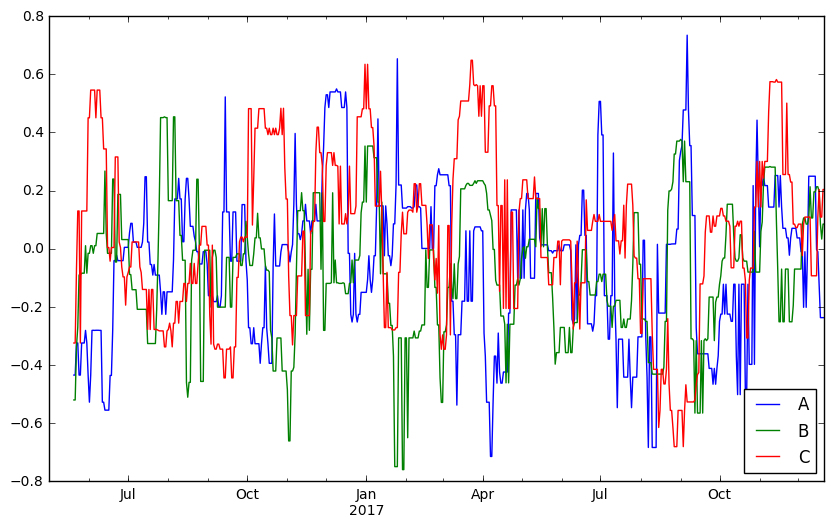

In [15]:
r.quantile(0.5).plot()

### What about a custom function?

In [16]:
# %load snippets/custom_rolling.py
df.rolling(window = 10, center = False).apply(lambda x: x[1]/x[2])[10:30]

,A,B,C
2016-05-11,3.362886,0.466138,4.726660
2016-05-12,15.082011,-1.192747,-0.149828
2016-05-13,-0.017740,-1.875653,-0.338950
2016-05-14,-2.385448,1.134411,-5.681272
2016-05-15,-0.893692,1.030924,1.203626
2016-05-16,0.351041,4.214651,-0.281880
2016-05-17,-0.620717,-2.160996,-0.568804
2016-05-18,-7.844572,-0.105703,-1.094465
2016-05-19,-0.530620,-1.157241,3.538202
2016-05-20,-0.473980,-1.151467,0.394812


### What if I want to generate a rolling window function of monthly data from daily data?

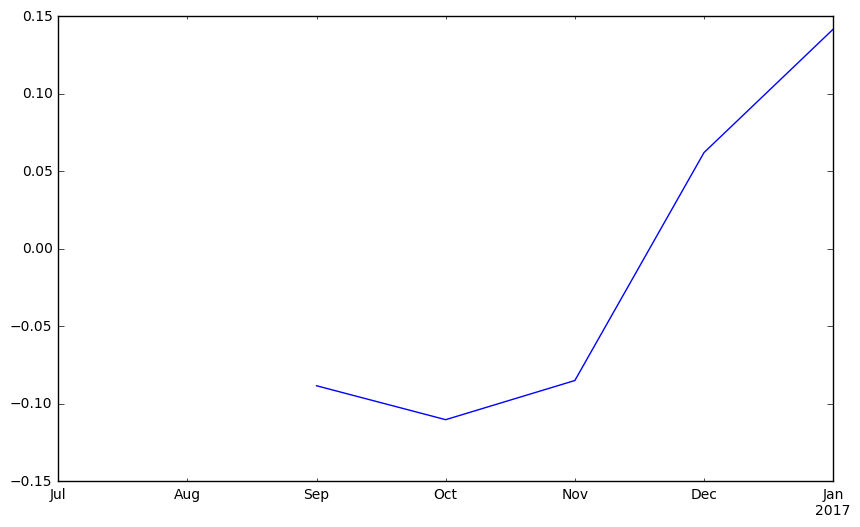

In [17]:
# %load snippets/resample_rolling.py
ts_long = pd.Series(np.random.randn(200),pd.date_range('7/1/16', freq = 'D', periods=200))
ts_long.resample('M').mean().rolling(window = 3).mean().plot()

## Expanding windows

In [18]:
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C
2016-05-02,-1.077609,-1.035710,-0.304316
2016-05-03,-0.363990,-1.152668,-0.313066
2016-05-04,-0.193949,-1.608156,-0.252284
2016-05-05,-0.150967,-0.787740,-0.108471


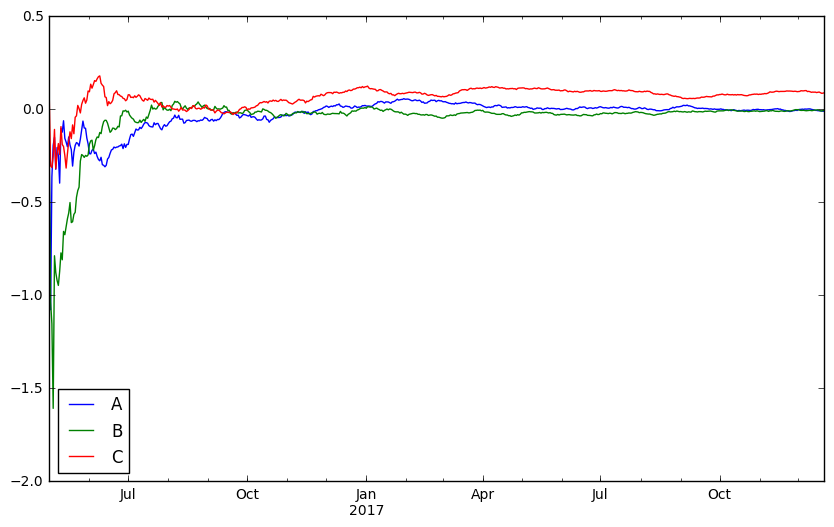

In [19]:
df.expanding(min_periods = 1).mean().plot()


In [20]:
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C
2016-05-02,-1.077609,-1.035710,-0.304316
2016-05-03,-0.363990,-1.152668,-0.313066
2016-05-04,-0.193949,-1.608156,-0.252284
2016-05-05,-0.150967,-0.787740,-0.108471


In [21]:
df.expanding(min_periods = 1)

Expanding [min_periods=1,center=False,axis=0]

# Try

(1) How can you perform an exponentially weight moving average rather than a window function? (hint: look for ewma + pandas docs)

(2) When would you use an expanding window vs. a rolling window?

(3) Write a custom function to repace .quantile(.5) function for a moving average

(4) How would you compute more than one aggregation function on a moving window function at the same time? 

In [23]:
# import pandas as pd
# import numpy as np
# # %load snippets/window_funcs_try.py
# #1
# ts = pd.Series(np.random.randn(1000), index = pd.date_range(start = '1/1/16', periods = 1000, freq = 'D'))
# ts.ewm(zspan = 60, frezq = 'D', min_periods = 0, adjust = True).mean().plot()
# ts.rolling(window = 60z).mean().plot()

# #2 
# # To get a more reliable statistic if it makes logical sense

